In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Variance-Covariance VaR

`Variance-Covariance` Method is also known as parametric method, because the data is assumed to be normally distributed. Variance-Covariance method is commonplace due to this assumption, however it is worth noting that returns are not normal distributed. Parametric form assumption makes the application of Variance-Covariance method practical and easy-to-apply. 

It is time to apply Value-at-Risk (VaR) method. First, we will start with Variance-Covariance VaR method. The formula of this method is given below:

\begin{equation}
\text{VaR}=V\sigma_p\sqrt{t}Z_{\alpha} 
\end{equation}

where

* V is the value of the assets.
* $\sigma_p$ is the standard deviation of the portfolio consisting of the assets.
* t is the time that the company hold the assets in its porfolio.
* $Z_{\alpha}$ is the standard deviation multiplier given the confidence interval if the data follows a normal distribution.

Let's import first the stock returns, weights, and other variables you generated in the previous notebook as well as variance-covariance VaR calculation:


In [2]:
stocks_returns = pd.read_csv('stocks_returns.csv')
stocks_returns = stocks_returns.set_index('Date')
weights = np.load('weights.npy')
total_asset = 1e6
conf_level = 0.95
t = 5

In order to calculate portfolio standard deviation ($\sigma_p$), you need to have covariance matrix and stock weights. Besides, in calculating $Z_{\alpha}$, it is required to define location parameter, which is mean of stock returns. These parameters are calculated below:

In [3]:
stocks_returns_mean = stocks_returns.mean().mean()
cov_var = stocks_returns.cov()
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

Now, you are all set to move forward and apply formula for Variance-Covariance VaR:

In [4]:
def VaR_parametric(total_asset, conf_level, port_std, t):
    alpha = norm.ppf(conf_level, stocks_returns_mean)
    VaR_param = np.round((total_asset * port_std * np.sqrt(t) * alpha), 2)
    return VaR_param

VaR_param = VaR_parametric(total_asset, conf_level, port_std, t)
VaR_param

56073.26

The Variance-Covariance method reveals a VaR value of $\$$56073.26, indicating that $95\%$ of the chance the maximum loss cannot exceed $56073.26 over 5-day period.

As a side note, the effect of holding period on VaR is positive. In other words, the longer the holding period, the higher the risk it is assumed as shown below. However, the VaR value increases at decreasing rate as the time passes.

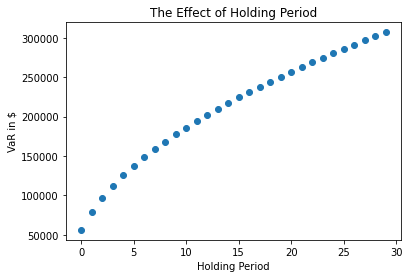

In [5]:
var_horizon = []
time_horizon = 30
for i in range(1, time_horizon + 1):
    var_horizon.append(VaR_param * np.sqrt(i))
plt.plot(var_horizon[:time_horizon], "o")
plt.title('The Effect of Holding Period')
plt.xlabel('Holding Period')
plt.ylabel('VaR in $')
plt.show()

# Historical VaR

Having strong assumption, like normal distribution, might be the cause of inaccurate  estimation. A solution to this issue is referred to as Historical Simulation VaR. This is an empirical method and instead of using parametric approach, what we do is to find the percentile, which is the Z-table equivelant of Variance-Covariance method. Pretend that the confidence interval is 95%, then 5% will be used in liue of Z-table value and all we need to do is to multiply this percentile by initial investment.

Here are the steps taken in Historical Simulation VaR:

* Obtain asset returns of the portfolio (or individual asset).

* Find the corresponding return percentile based on confidence interval.

* Multiply this percentile by initial investment and square root of holding period.

At 95\% of confidence level, historical VaR result is shown below:

In [6]:
weights

array([0.33431167, 0.20184982, 0.46383851])

In [7]:
def VaR_historical(total_asset, conf_level):
    port = (weights * stocks_returns).sum(axis=1)
    hist_percentile95 = np.percentile(port, 95)
    VaR_historical = np.round((total_asset * np.sqrt(t) * hist_percentile95), 2)
    return VaR_historical

In [8]:
VaR_historical(total_asset, conf_level)

55311.91

The result is very similar to Variance-Covariance VaR method. Accordingly, historical VaR value of $55311.91 shows that 95\% of chance the maximum loss cannot exceed this amount over 5-day period.